In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data

In [5]:
# Import file
df = pd.read_csv('disneyland_reviews.csv', encoding='latin-1')
df.head(2)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong


# EDA

In [6]:
df.shape

(42656, 6)

In [7]:
# Rename columns for easier interpretability
df.rename(columns={'Year_Month':'Date', 'Review_ID': 'ID', 
                   'Review_Text': 'Reviews'}, inplace=True)
df.head(2)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong


In [8]:
# Clean up branch names - remove "Disneyland_"
df['Branch']=df['Branch'].apply(lambda x: x.split('Disneyland_')[1])
df.head(2)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong


In [9]:
# Note that the Date column is a string object, not datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Date               42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Reviews            42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [10]:
# Check the 'Date' column
dates = df.Date
dates.value_counts()

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Date, Length: 112, dtype: int64

**Although there are no null values, there are dates marked as "missing".  There are over 2000 missing date values.**

In [13]:
# Ratings range from 1 to 5. 
# The mean rating is 4.2, which means that there are many more 4 and 5 reviews than 1, 2, 3.
# We can see that only 25% of the ratings are at or below 4
df.describe()

,ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [14]:
# # Add 'Sentiment' column, set >3 stars to Positive, <3 to Negative, all others to Neutral
# df['Sentiment'] = ["Positive" if x >3 else "Negative" if x <3 else "Neutral" for x in df.Rating]

# df.head()

In [15]:
# Remove all 3-star reviews to avoid neutral statements
df = df[df.Rating!=3]

In [16]:
# Add 'Rating_Type' column, set >=4 stars to Positive, <4 to Negative
df['Rating_Type'] = ['Positive' if x >=4 else 'Negative' for x in df.Rating]

df.sample(2)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Rating_Type
40773,137516438,2,2012-8,Guernsey,What a rip off! And the queues my goodness. ...,Paris,Negative
9284,119777688,4,2011-10,Philippines,Its still Disneyland even if its smaller. Gre...,HongKong,Positive


In [17]:
# ~90% of reviews are Positive and ~10% are Negative
df.Rating_Type.value_counts(normalize=True)

Positive    0.903428
Negative    0.096572
Name: Rating_Type, dtype: float64

In [18]:
# Distribution of ratings
df.Rating.value_counts()

5    23146
4    10775
2     2127
1     1499
Name: Rating, dtype: int64

Text(40.00611215277779, 0.5, 'Number of Reviews')

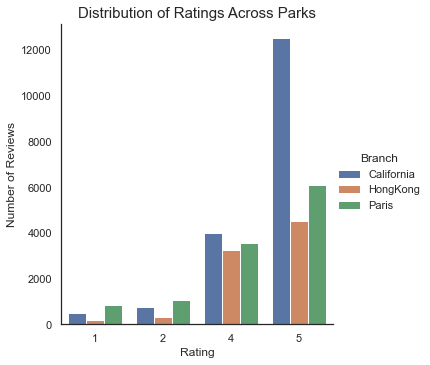

In [80]:
# Countplot
# Distribution of ratings across parks
total_reviews = df.groupby(by=['Branch', 'Rating'])['ID'].count().reset_index()

sns.catplot(x='Rating', y='ID', hue='Branch', data=total_reviews, kind='bar')

plt.title("Distribution of Ratings Across Parks", fontsize=15)
plt.ylabel("Number of Reviews")

There are many more positive reviews than negative.  
Remember that we also removed reviews with Rating=3 to remove neutral ratings/sentiment.  
Imbalanced toward California Park, which has significantly more reviews than the other parks.

In [101]:
# Average ratings for each park (minus the 3-star reviews)
total_calif = int(df.loc[df['Branch'].isin(['California']), 'Rating'].sum())/int(df.loc[df['Branch'].isin(['California']), 'ID'].count())
total_hongk = int(df.loc[df['Branch'].isin(['HongKong']), 'Rating'].sum())/int(df.loc[df['Branch'].isin(['HongKong']), 'ID'].count())
total_paris = int(df.loc[df['Branch'].isin(['Paris']), 'Rating'].sum())/int(df.loc[df['Branch'].isin(['Paris']), 'ID'].count())

print("The average rating for Disneyland - California is: ", total_calif)
print("The average rating for Disneyland - Hong Kong is: ", total_hongk)
print("The average rating for Disneyland - Paris is: ", total_paris)

The average rating for Disneyland - California is:  4.536883629191322
The average rating for Disneyland - Hong Kong is:  4.403270745003028
The average rating for Disneyland - Paris is:  4.1332813717848795


Disney - California has the highest average rating.  
Disney - Paris has the lowest average rating.

### Save Files

In [126]:
df.to_pickle('df_sentiment_pkl')
df.to_csv('df_sentiment.gz', compression='gzip', encoding='utf-8', index=False)

# Sentiment Analysis

In [62]:
# Assign the text reviews into a corpus of documents
corpus = df.Reviews
corpus

0        If you've ever been to Disneyland anywhere you...
1        Its been a while since d last time we visit HK...
2        Thanks God it wasn   t too hot or too humid wh...
3        HK Disneyland is a great compact park. Unfortu...
4        the location is not in the city, took around 1...
                               ...                        
42651    i went to disneyland paris in july 03 and thou...
42652    2 adults and 1 child of 11 visited Disneyland ...
42653    My eleven year old daughter and myself went to...
42654    This hotel, part of the Disneyland Paris compl...
42655    I went to the Disneyparis resort, in 1996, wit...
Name: Reviews, Length: 37547, dtype: object

## VADER
**Compound score normalized between -1 (most extreme negative) and +1 (most extreme positive)**

In [127]:
# Set the display constraints to be able to read entire reviews
pd.set_option('display.max_colwidth', None)

# Make a copy of the dataframe
df_vader = df.copy()

# Analyze with VADER
v_analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scorer to the entire column of review data
df_vader['Sentiment_Score'] = df_vader.Reviews.map(v_analyzer.polarity_scores).map(lambda x: x.get('compound'))
df_vader.head(3)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Rating_Type,Sentiment_Score
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,HongKong,Positive,0.7069
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",HongKong,Positive,0.9853
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",HongKong,Positive,0.9920


In [ ]:
# # Set the display constraints to be able to read entire reviews
# pd.set_option('display.max_colwidth', None)

# # Review with highest sentiment score
# highest_sentiment = df_vader.iloc[df_vader.Sentiment_Score.idxmax()]
# highest_sentiment

In [ ]:
# # Review the lowest sentiment score
# lowest_sentiment = df_vader.iloc[df_vader.Sentiment_Score.idxmin()]
# lowest_sentiment

In [ ]:
# df_vader.Sentiment_Score.idxmin()

In [129]:
# The highest sentiment score
max_Score = df_vader['Sentiment_Score'].max()

# One of the reviews with the highest sentiment scores
highest_sentiments = df_vader[df_vader['Sentiment_Score']==max_Score]
highest_sentiments.sample(1)

ID  Rating    Date Reviewer_Location  \
30544  573139508       5  2018-4    United Kingdom   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [74]:
# Number of reviews with the same max sentiment score
len(highest_sentiments)

8

In [130]:
# Review with the lowest sentiment score
min_Score = df_vader['Sentiment_Score'].min()

lowest_sentiment = df_vader[df_vader['Sentiment_Score']==min_Score]
lowest_sentiment

ID  Rating     Date Reviewer_Location  \
2823  452236934       1  2016-12         Hong Kong   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [110]:
# Average sentiment of all the positive reviews
avg_pos_sentiment = df_vader.Sentiment_Score[df_vader.Rating_Type == 'Positive'].mean()
print('The average sentiment of all of the positive reviews are: ', avg_pos_sentiment)

The average sentiment of all of the positive reviews are:  0.793291993160579


In [109]:
# Average sentiment of all the negative reviews
avg_neg_sentiment = df_vader.Sentiment_Score[df_vader.Rating_Type == 'Negative'].mean()
print('The average sentiment of all of the negative reviews are: ', avg_neg_sentiment)

The average sentiment of all of the negative reviews are:  0.05847639271924986


**4- and 5-star reviews are quite positive with an average sentiment score close to 0.8 while 1- and 2-star reviews are  still positive, although barely.**

This may be because of lengthy reviews, as most people who have experiences at the extremes tend to vent out and reviews become  verbose.  As sentences get longer, more neutral words exist, and therefore, the overall score tends to normalize towards neutral, or in this case make something negative more positive.  

Also, note that capital letters and punctuation marks increase the sentiment score.

### Save Files

In [131]:
df_vader.to_pickle('df_sentiment_score_pkl')
df_vader.to_csv('df_sentiment_score.gz', compression='gzip', encoding='utf-8', index=False)

In [106]:
df_vader = pd.read_pickle('df_sentiment_score_pkl')

# Visualization of Sentiment

In [132]:
# Distribution of sentiment scores
df_vader[['Sentiment_Score']].describe()

,Sentiment_Score
count,37547.000000
mean,0.722329
std,0.443817
min,-0.998100
25%,0.723100
50%,0.909500
75%,0.968800
max,0.999900


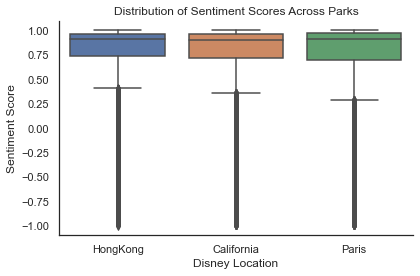

In [40]:
# Boxplot of sentiment scores across the different parks
sns.set(style='white')
sns.boxplot(x="Branch", y="Sentiment_Score",  
            data=df_vader).set(title='Distribution of Sentiment Scores Across Parks')
sns.despine()

plt.xlabel('Disney Location')
plt.ylabel('Sentiment Score')
plt.tight_layout()

Text(0.5, 0, 'Sentiment Score')

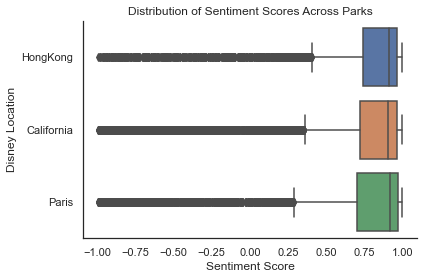

In [154]:
# Horizontal view shows differences a little better....
sns.set(style='white')
sns.boxplot(x=df_vader.Sentiment_Score, y=df_vader.Branch,  
            data=df_vader).set(title='Distribution of Sentiment Scores Across Parks')
sns.despine()

plt.ylabel('Disney Location')
plt.xlabel('Sentiment Score')


<AxesSubplot:>

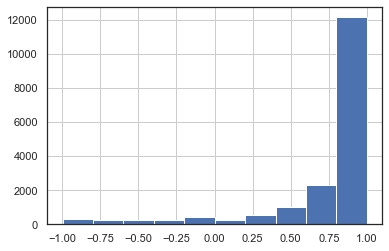

In [44]:
# Distribution of Sentiment for everything Disney - California
df_vader[df_vader.Branch=='California']['Sentiment_Score'].hist()

<AxesSubplot:>

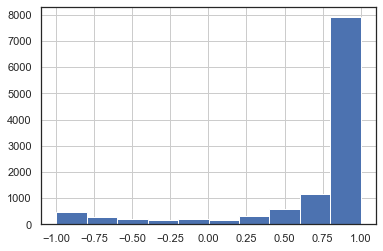

In [43]:
# Distribution of Sentiment for everything Disney - Paris
df_vader[df_vader.Branch=='Paris']['Sentiment_Score'].hist()

<AxesSubplot:>

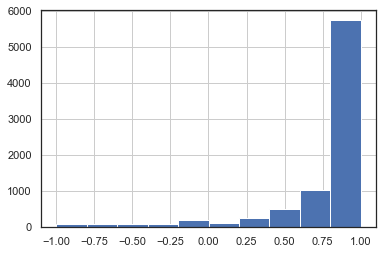

In [45]:
# Distribution of Sentiment for everything Disney - HongKong
df_vader[df_vader.Branch=='HongKong']['Sentiment_Score'].hist()

For each park, the Sentiment is largely skewed right, so people are, more often than not, having a great time at these parks!